In [1]:
!pip install -r requirements.txt

### 1. Import dependencies

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



### 2. Basic Processing


In [2]:
df = pd.read_csv('EDA/data/processed/MissingValuesHandled.csv')
df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.00,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41.00,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42.00,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,38.91,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43.00,2,125510.82,1,1,1,79084.10,0


In [4]:
print(f"No of Rows : {len(df)}")

No of Rows : 10000


### 3. Outlier detection techniques

#### 3.1 distribution plots

In [3]:
categorical_columns = [
                      'Geography',
                      'Gender', 'HasCrCard',
                      'IsActiveMember','Exited'
                      ]

numerical_columns = [
                    'Age', 'Tenure', 'CreditScore',
                    'Balance', 'EstimatedSalary', 'NumOfProducts'
                    ]


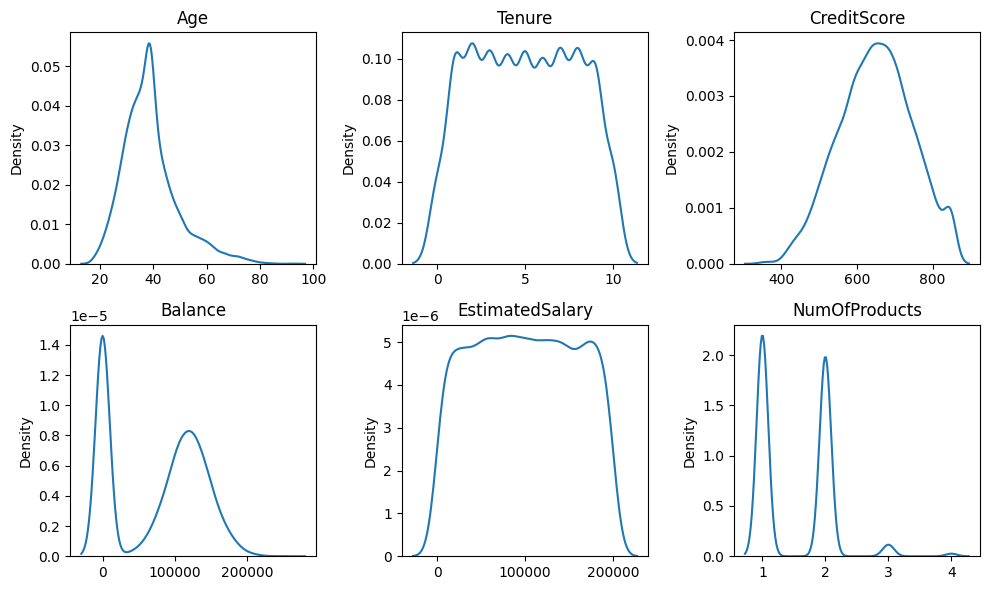

In [4]:
fig, axes = plt.subplots(2, 3, figsize = (10, 6))
axes =axes.flatten()

for idx, col in enumerate(numerical_columns):
  sns.kdeplot(
            data =df[col],
            ax= axes [idx]
            )
  axes [idx].set_title(col)
  axes [idx].set_xlabel('')

plt.tight_layout()
plt.show()


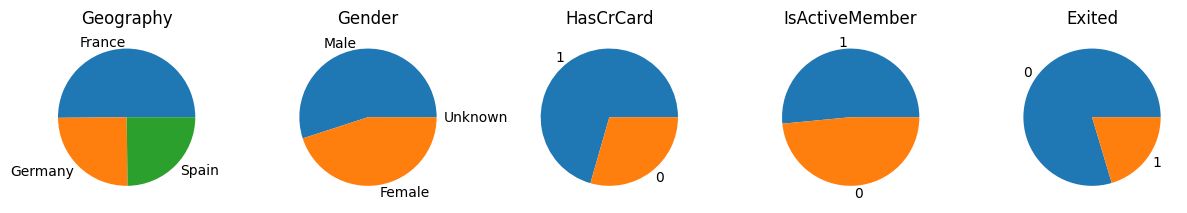

In [5]:
fig, axes = plt.subplots(1, 5, figsize = (12, 10))


for idx, col in enumerate(categorical_columns):
  df[col].value_counts().plot(
                              kind='pie',
                              ax=axes[idx]
                            )
  
  axes [idx].set_title(col)
  axes [idx].set_ylabel('')

plt.tight_layout()
plt.show()

#### 3.2 Box Plots


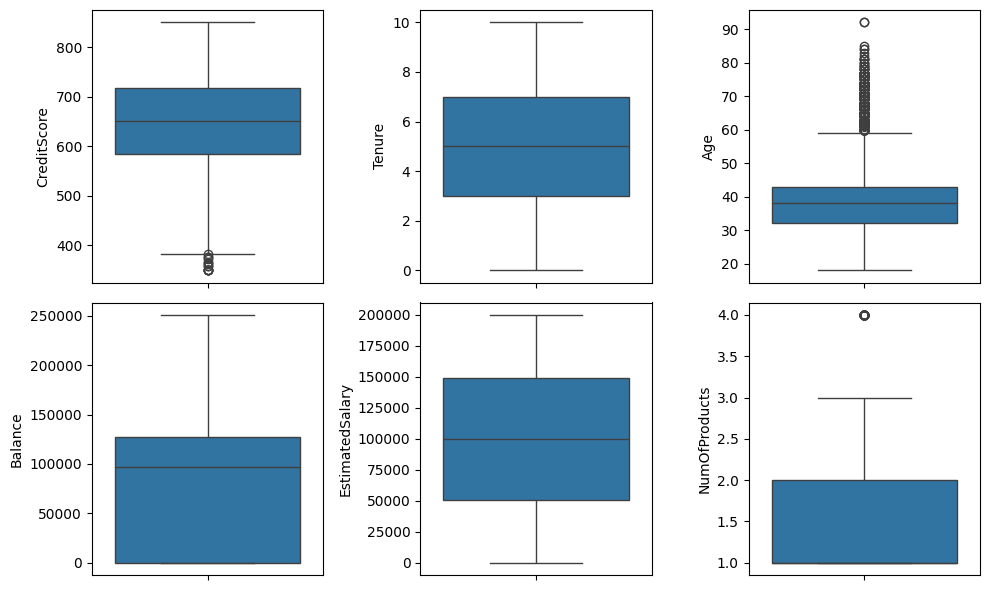

In [7]:
numerical_columns = [
                    'Age', 'Tenure', 'CreditScore',
                    'Balance', 'EstimatedSalary', 'NumOfProducts'
                    ]

fig, axes = plt.subplots(2, 3, figsize = (10, 6))

sns.boxplot(data =df['CreditScore'], ax= axes[0,0])
sns.boxplot(data =df['Tenure'], ax= axes[0,1])
sns.boxplot(data =df['Age'], ax= axes[0,2])
sns.boxplot(data =df['Balance'], ax= axes[1,0])
sns.boxplot(data =df['EstimatedSalary'], ax= axes[1,1])
sns.boxplot(data =df['NumOfProducts'], ax= axes[1,2])

plt.tight_layout()
plt.show()

#### 3.3 Empirical Rule / Three Sigma Rule

In [9]:
def find_anomaly(data):

  mean = data.mean()
  std = data.std()

  upper_bound = mean + (3 * std)
  lower_bound = mean - (3 * std)

  return (data > upper_bound)| (data < lower_bound)

In [10]:
numerical_columns = [
                    'Age', 'Tenure', 'CreditScore',
                    'Balance', 'EstimatedSalary'
                    ]

for col in numerical_columns:
  n_outliers = find_anomaly(df[col]).sum()
  n_outlier_precentage = round(n_outliers / len(df), 3)
  print(f" {col} : {n_outliers} outliers({n_outlier_precentage} %)")

 Age : 144 outliers(0.014 %)
 Tenure : 0 outliers(0.0 %)
 CreditScore : 8 outliers(0.001 %)
 Balance : 0 outliers(0.0 %)
 EstimatedSalary : 0 outliers(0.0 %)


#### 3.4 IQR Method

In [11]:
def find_anomaly(data):

  Q1 = np.percentile(data, 25)
  Q3 = np.percentile(data, 75)

  IQR = Q3 - Q1

  upper_bound = Q3 + 1.5 * IQR
  lower_bound = Q1 - 1.5 * IQR

  return (data > upper_bound)| (data < lower_bound)

In [12]:
numerical_columns = [
                    'Age', 'Tenure', 'CreditScore',
                    'Balance', 'EstimatedSalary'
                    ]

for col in numerical_columns:
  n_outliers = find_anomaly(df[col]).sum()
  n_outlier_precentage = round(n_outliers / len(df), 3)
  print(f" {col} : {n_outliers} outliers({n_outlier_precentage} %)")

 Age : 501 outliers(0.05 %)
 Tenure : 0 outliers(0.0 %)
 CreditScore : 15 outliers(0.002 %)
 Balance : 0 outliers(0.0 %)
 EstimatedSalary : 0 outliers(0.0 %)


In [13]:
outlier_mask_log = pd.DataFrame()
for col in numerical_columns:
  outlier_mask_log[col] = find_anomaly(df[col])

outlier_count = outlier_mask_log.sum(axis =1)
outlier_mask_log['Outlier Count'] = outlier_count
outlier_mask_log = outlier_mask_log[outlier_mask_log['Outlier Count'] == 2]
outlier_mask_log

,Age,Tenure,CreditScore,Balance,EstimatedSalary,Outlier Count
8762,True,False,True,False,False,2


In [14]:
df.to_csv('EDA/data/processed/Outliers_Handled.csv', index = False)